### Fine Tuning Task  

강아지, 머핀 이진 분류  
https://drive.google.com/file/d/1Q_KC2nTmGlX2PeINWwV63_kpTjnoVpiO/view?usp=sharing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 150
BATCH_SIZE = 64

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로 지정
original_dir = './datasets/muffin/original/'
# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
original_generator = idg.flow_from_directory(original_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary', 
                                             shuffle=True)

# 경로 지정
test_dir = './datasets/muffin/test/'
# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
test_generator = idg.flow_from_directory(test_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary')

# 각 클랙스의 이름과 인덱스 출력
print(original_generator.class_indices)
print(test_generator.class_indices)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}


In [2]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'chihuahua', 1: 'muffin'}

In [3]:
# 각 타겟의 이름 담을 초기 list 선언
original_target_names = []
test_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(original_target_names.__len__(), test_target_names.__len__())

4733 1184


In [4]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)
display(test_df)

,file_paths,target_names,targets
0,./datasets/muffin/original/chihuahua/img_0_0.jpg,chihuahua,0
1,./datasets/muffin/original/chihuahua/img_0_1.jpg,chihuahua,0
2,./datasets/muffin/original/chihuahua/img_0_10.jpg,chihuahua,0
3,./datasets/muffin/original/chihuahua/img_0_100...,chihuahua,0
4,./datasets/muffin/original/chihuahua/img_0_100...,chihuahua,0
...,...,...,...
4728,./datasets/muffin/original/muffin/img_4_984.jpg,muffin,1
4729,./datasets/muffin/original/muffin/img_4_990.jpg,muffin,1
4730,./datasets/muffin/original/muffin/img_4_995.jpg,muffin,1
4731,./datasets/muffin/original/muffin/img_4_998.jpg,muffin,1


,file_paths,target_names,targets
0,./datasets/muffin/test/chihuahua/img_0_1071.jpg,chihuahua,0
1,./datasets/muffin/test/chihuahua/img_0_1074.jpg,chihuahua,0
2,./datasets/muffin/test/chihuahua/img_0_1082.jpg,chihuahua,0
3,./datasets/muffin/test/chihuahua/img_0_1087.jpg,chihuahua,0
4,./datasets/muffin/test/chihuahua/img_0_11.jpg,chihuahua,0
...,...,...,...
1179,./datasets/muffin/test/muffin/img_4_979.jpg,muffin,1
1180,./datasets/muffin/test/muffin/img_4_989.jpg,muffin,1
1181,./datasets/muffin/test/muffin/img_4_991.jpg,muffin,1
1182,./datasets/muffin/test/muffin/img_4_996.jpg,muffin,1


In [5]:
from sklearn.model_selection import train_test_split

# 검증용 데이터 세트 분리
train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, random_state=124)

# 타겟 비중 확인
print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
0    2047
1    1739
Name: count, dtype: int64
targets
0    512
1    435
Name: count, dtype: int64


In [7]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/muffin/'

for filepath in train_images:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

In [8]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/muffin/'

for filepath in validation_images:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

In [9]:
# 인덱스 번호를 대조하여 각 데이터 프레임 나누기
train_df = original_df.loc[train_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

3786
947
1184


In [10]:
train_df

,file_paths,target_names,targets
0,./datasets/muffin/original/chihuahua/img_0_754...,chihuahua,0
1,./datasets/muffin/original/muffin/img_4_763.jpg,muffin,1
2,./datasets/muffin/original/chihuahua/img_3_514...,chihuahua,0
3,./datasets/muffin/original/chihuahua/img_0_176...,chihuahua,0
4,./datasets/muffin/original/chihuahua/img_2_869...,chihuahua,0
...,...,...,...
3781,./datasets/muffin/original/chihuahua/img_2_772...,chihuahua,0
3782,./datasets/muffin/original/muffin/img_3_826.jpg,muffin,1
3783,./datasets/muffin/original/muffin/img_3_180.jpg,muffin,1
3784,./datasets/muffin/original/chihuahua/img_0_449...,chihuahua,0


In [ ]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

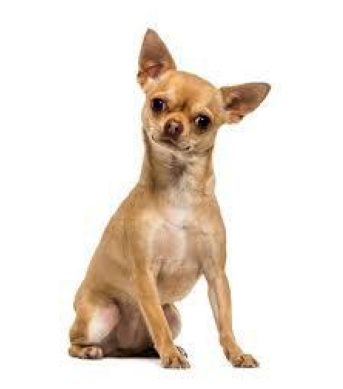

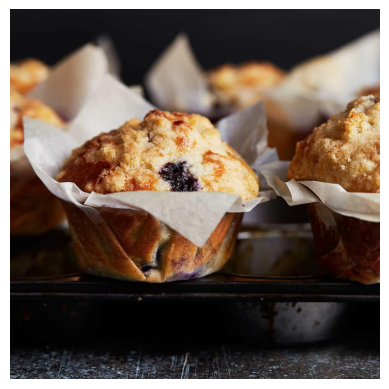

In [11]:
import cv2
import matplotlib.pyplot as plt

# RGB로 색상 형식을 변환하여 이미지 가져오기
image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[500]), cv2.COLOR_BGR2RGB)
show_image(image)

# RGB로 색상 형식을 변환하여 이미지 가져오기
image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[100]), cv2.COLOR_BGR2RGB)
show_image(image)

In [12]:
from tensorflow.keras.applications.resnet50 import preprocess_input

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 150
BATCH_SIZE = 64

# 이미지 전처리 객체 생성
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# 이미지 전처리
# 디렉토리에서 이미지를 가져와 배치로 변환
train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary"
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary"
)

# 각 클랙스의 이름과 인덱스 출력
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 3786 validated image filenames belonging to 2 classes.
Found 947 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}


In [13]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 150
BATCH_SIZE = 64

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 50개의 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 1개의 뉴런과 시그모이드 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(1, activation='sigmoid', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [19]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='resnet50', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [20]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_1 trainable: False
2 . conv1_pad trainable: False
3 . conv1_conv trainable: False
4 . pool1_pad trainable: False
5 . pool1_pool trainable: False
6 . conv2_block1_preact_bn trainable: False
7 . conv2_block1_preact_relu trainable: False
8 . conv2_block1_1_conv trainable: False
9 . conv2_block1_1_bn trainable: False
10 . conv2_block1_1_relu trainable: False
11 . conv2_block1_2_pad trainable: False
12 . conv2_block1_2_conv trainable: False
13 . conv2_block1_2_bn trainable: False
14 . conv2_block1_2_relu trainable: False
15 . conv2_block1_0_conv trainable: False
16 . conv2_block1_3_conv trainable: False
17 . conv2_block1_out trainable: False
18 . conv2_block2_preact_bn trainable: False
19 . conv2_block2_preact_relu trainable: False
20 . conv2_block2_1_conv trainable: False
21 . conv2_block2_1_bn trainable: False
22 . conv2_block2_1_relu trainable: False
23 . conv2_block2_2_pad trainable: False
24 . conv2_block2_2_conv trainable: False
25 . conv2_block2_2_bn trainable: False


In [29]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras import layers

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 150
BATCH_SIZE = 64

# fine tuning 함수 선언
def fine_tune(datas, model_name, aug, preprocess):
    # 반복 횟수
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10

    # Unpacking (데이터 분리)
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # Dataset class로 객체 생성
    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=preprocess, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=preprocess)

    # 모델 생성 함수를 사용하여 모델 생성
    model = create_model(model_name=model_name, verbose=True)
    
    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze (분류기 빼고 모두 freeze)
    for layer in model.layers[:-5]:
        layer.trainable = False

    # 1차 훈련
    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화(BatchNormalization)만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:85]:
        layer.trainable = False

    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(0.00001), loss=BinaryCrossentropy(), metrics=['acc'])

    # 2차 훈련
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
import albumentations as A

# 데이터 경로 및 타겟 담기
# 이진분류이기 때문에 원-핫 인코딩 미진행
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

# fine tuning 함수 호출하여 미세 조정 진행
model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                           'resnet50',
                           aug,
                           resnet50_preprocess_input)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - acc: 0.5448 - loss: 61.2571 - val_acc: 0.5407 - val_loss: 0.6931
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - acc: 0.5435 - loss: 1.2244 - val_acc: 0.5407 - val_loss: 0.6924
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - acc: 0.5452 - loss: 0.7888 - val_acc: 0.5407 - val_loss: 0.6916
Epoch 4/10
47/60 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 0.5284 - loss: 0.8635

In [ ]:
# 데이터 경로 및 타겟 담기 
test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values

# Dataset class로 객체 생성
test_dataset = Dataset(test_file_paths, 
                            test_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=resnet50_preprocess_input)

In [ ]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

In [ ]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)